In [20]:
from pylab import rcParams
from xgboost import XGBClassifier
rcParams['figure.figsize'] = 10, 5
from plot_metric.functions import BinaryClassification
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report

In [2]:
data= pd.read_csv('../data.csv')
data.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit,Term_Short Term,Years in current job_10+ years,Years in current job_2 years,...,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Loan Status
0,445412.0,709.0,1167493.0,5214.74,17.2,228190.0,416746.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,99999999.0,741.0,2231892.0,29200.53,14.9,297996.0,750090.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,347666.0,721.0,806949.0,8741.90,12.0,256329.0,386958.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,206602.0,7290.0,896857.0,16367.74,17.3,215308.0,272448.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,217646.0,730.0,1184194.0,10855.08,19.6,122170.0,272052.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [3]:
data.dtypes

Current Loan Amount               float64
Credit Score                      float64
Annual Income                     float64
Monthly Debt                      float64
Years of Credit History           float64
Current Credit Balance            float64
Maximum Open Credit               float64
Term_Short Term                   float64
Years in current job_10+ years    float64
Years in current job_2 years      float64
Years in current job_3 years      float64
Years in current job_4 years      float64
Years in current job_5 years      float64
Years in current job_6 years      float64
Years in current job_7 years      float64
Years in current job_8 years      float64
Years in current job_9 years      float64
Years in current job_< 1 year     float64
Home Ownership_Own Home           float64
Home Ownership_Rent               float64
Loan Status                         int64
dtype: object

In [4]:
##copying data
data1=data.copy()

### spliting data en X et Y

In [5]:
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

### spliting the data to train and test

In [6]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

### XGBoost

In [7]:
## converting Y_train & X_test & Y_train & Y_test to numpy array pour XGBoost
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [8]:
xgb= XGBClassifier()
params= {
        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13,14],
        'n_estimators' : [100, 300, 500, 800]
        }

##accuracy
grid_search_acc= GridSearchCV(estimator=xgb, param_grid= params, scoring='accuracy',cv=3)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

----------
best parameters:  {'max_depth': 7, 'n_estimators': 100}
----------
[[11625  3734]
 [   99 15308]]
----------
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     15359
           1       0.80      0.99      0.89     15407

    accuracy                           0.88     30766
   macro avg       0.90      0.88      0.87     30766
weighted avg       0.90      0.88      0.87     30766

----------


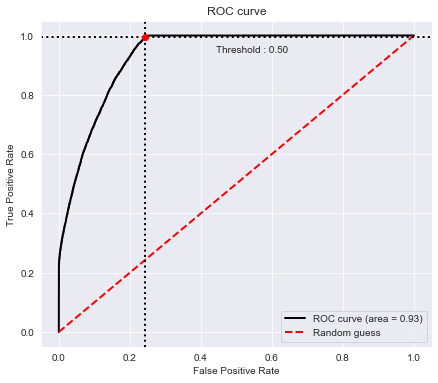

In [9]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('ROC curve')
plt.show()

In [10]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=xgb, param_grid= params, scoring=rec_avg,cv=3)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [11]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'max_depth': 7, 'n_estimators': 100}
----------
[[11625  3734]
 [   99 15308]]
----------
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     15359
           1       0.80      0.99      0.89     15407

    accuracy                           0.88     30766
   macro avg       0.90      0.88      0.87     30766
weighted avg       0.90      0.88      0.87     30766

----------


In [12]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=xgb, param_grid= params, scoring=prec_avg,cv=3)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [13]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'max_depth': 5, 'n_estimators': 100}
----------
[[11582  3777]
 [   78 15329]]
----------
              precision    recall  f1-score   support

           0       0.99      0.75      0.86     15359
           1       0.80      0.99      0.89     15407

    accuracy                           0.87     30766
   macro avg       0.90      0.87      0.87     30766
weighted avg       0.90      0.87      0.87     30766

----------


In [28]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1), len(grid_param_2))
    scores_mean= scores_mean.T
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.87,0.90])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
        #ax.plot(19, scores_mean[idx, -1:], '*', label= 'crt' + '=' + str(val) + ' & mx_dpt=None')
        
    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

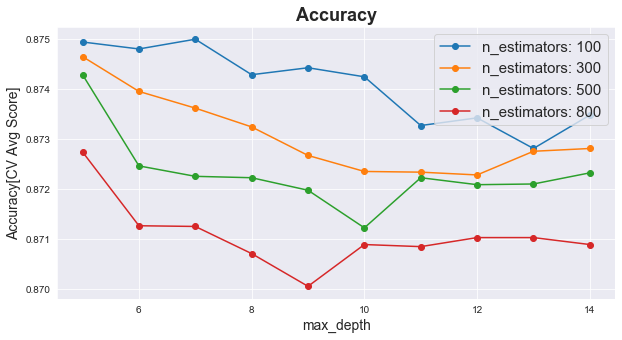

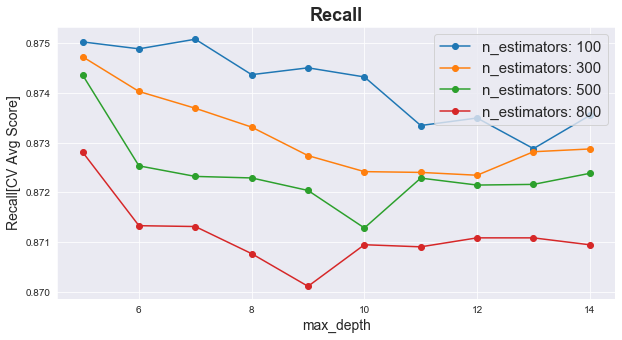

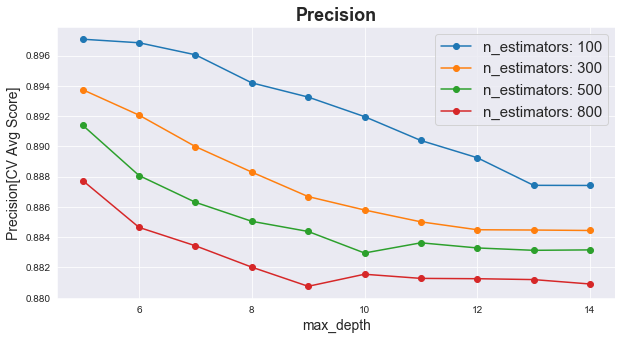

In [29]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['max_depth'], params['n_estimators'],  'max_depth', 'n_estimators', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['max_depth'], params['n_estimators'],  'max_depth', 'n_estimators', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['max_depth'], params['n_estimators'], 'max_depth', 'n_estimators', 'Precision')


In [16]:
##return index for dataframe
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list
index= return_index_list(params['max_depth'], params['n_estimators'])

In [17]:
df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                     'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)
        
## to excel
writer = pd.ExcelWriter('XGBoost.xlsx')
df.to_excel(writer, 'XGboost')
writer.save()
writer.close()

In [18]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[5, 100]",0.874948,0.897082,0.875027,0.000952
"[5, 300]",0.874655,0.893746,0.874729,0.001219
"[5, 500]",0.874293,0.891398,0.874363,0.001125
"[5, 800]",0.872747,0.887743,0.872813,0.001125
"[6, 100]",0.874808,0.896847,0.874887,0.000956
"[6, 300]",0.873959,0.892064,0.874031,0.000949
"[6, 500]",0.872468,0.888072,0.872535,0.001499
"[6, 800]",0.871270,0.884645,0.871333,0.001618
"[7, 100]",0.875003,0.896053,0.875081,0.001033
"[7, 300]",0.873624,0.889987,0.873693,0.001026


In [19]:
grid_search_acc.cv_results_



{'mean_fit_time': array([  5.74865802,  15.38749631,  26.2189072 ,  41.67956042,
          6.47269297,  19.45008469,  30.03763437,  66.15100416,
         17.43238584,  49.79241562,  82.65868052, 132.76640423,
         19.93304221,  54.44622405,  39.25192436,  64.71927698,
          9.44544315,  27.21163932,  44.91854223,  74.07991521,
         10.49925756,  30.76536767,  51.55832465,  81.43804248,
         11.50590968,  37.02553638,  58.51729679,  89.57572826,
         14.74737748,  37.20191685,  61.23442237,  97.0496935 ,
         13.96572677,  40.20725528,  66.89767663, 106.28114231,
         15.28403012,  43.58375438,  72.34696205, 114.56497629]),
 'std_fit_time': array([6.68774395e-01, 1.59988233e-01, 5.65291149e-01, 8.00763960e-01,
        1.62664573e-02, 3.20991164e-01, 8.49965081e-01, 2.73083591e+01,
        1.63509524e-01, 2.27150483e-01, 2.10307623e+00, 2.46057654e+00,
        1.52416191e-01, 3.63627706e+00, 2.46098170e-01, 1.68097757e+00,
        5.58194689e-02, 3.38803979e-0